In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

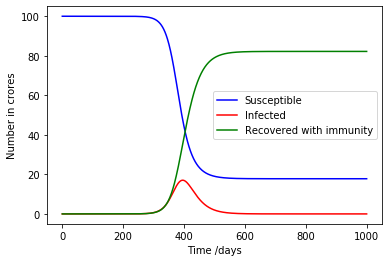

In [41]:
# Total population, N.
N = 1000000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.1, 1./21
# A grid of time points (in days)
t = np.linspace(0, 1000, 1000)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plt.plot(t, S/10000000, 'b', label='Susceptible')
plt.plot(t, I/10000000, 'r', label='Infected')
plt.plot(t, R/10000000, 'g', label='Recovered with immunity')
plt.xlabel('Time /days')
plt.ylabel('Number in crores')
plt.legend()
plt.show()